In [2]:
import numpy as np
import scipy.special as sp
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=22)
plt.rcParams['figure.figsize'] = (10.0, 7.0)
# For multiple axes in one fig
from matplotlib import gridspec 
# For TeX fonts
plt.rc('text', usetex=True)

In [3]:
# Neutron to Gamma Pulse Shape Discrimination in Liquid
# Argon Detectors with High Quantum Efficiency
# Photomultiplier Tubes

In [4]:
tauT = 1450 # ns, 1.3 - 1.6 us according to WARP
tauS = 5.5

LY = 6.35# phe/keV±
prompt = 120 # ns

fprompt_er = 0.3
fprompt_nr = 0.65 # Values read from fig. 7 for 50 keV
E = 50

# fprompt_er = 0.25
# fprompt_nr = 0.8
# E = 100

In [26]:
import matplotlib as mpl
def draw_box(x, y, **kwargs):
    """Draw rectangle, given x-y boundary tuples"""
    # Arcane syntax of the week: matplotlib's Rectangle...
    plt.gca().add_patch(mpl.patches.Rectangle(
        (x[0], y[0]), x[1] - x[0], y[1] - y[0], **kwargs))

In [5]:
def single_pe(t, t0, tau):
    return np.concatenate([np.zeros(np.sum(t < t0)), np.exp(-(t[t>=t0] - t0) / tau)])
    # return np.exp(-(t - t0) / tau) * (t > t0)

In [6]:
def simpulse(t, fS, nph, tau, jitter):
    nph = np.int(nph)
    nS = np.int(fS * nph)
    nT = nph - nS
    
    timesS = np.random.exponential(scale=tauS, size = nS)
    timesT = np.random.exponential(scale=tauT, size = nT)
    times = np.concatenate([timesS, timesT])
    times += np.random.normal(0, jitter, nph)
    ys = np.zeros(len(t))
    for time in times:
        ys = ys + single_pe(t, time, tau)
        
    return ys

In [23]:
t = np.linspace(-300, 4000, 2151)
y_er = simpulse(t, fprompt_er, E * LY, 10, 20)
y_nr = simpulse(t, fprompt_nr, E * LY, 10, 20)

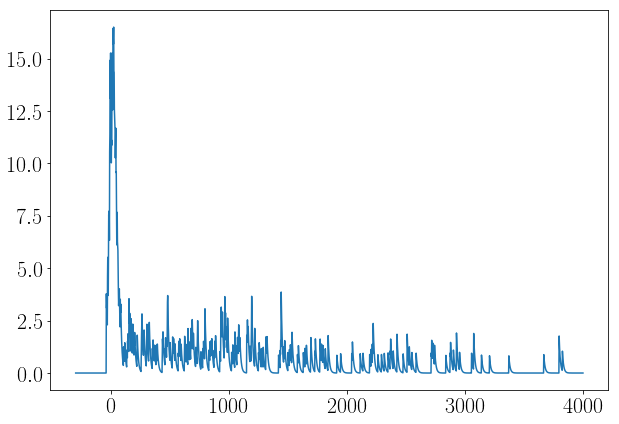

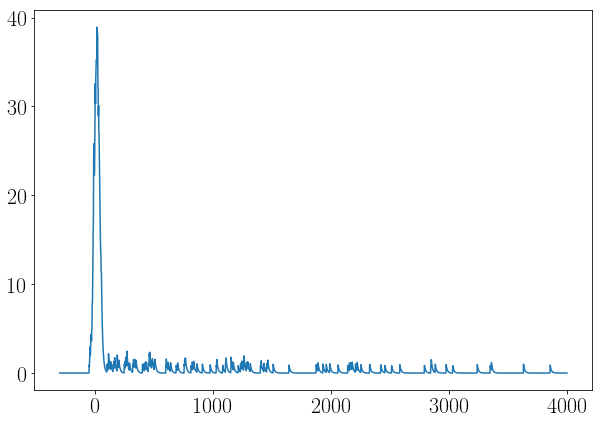

In [24]:
plt.plot(t, y_er)

plt.show()

plt.plot(t, y_nr)
# plt.ylim(0, 25)
# plt.yscale('log')
plt.show()

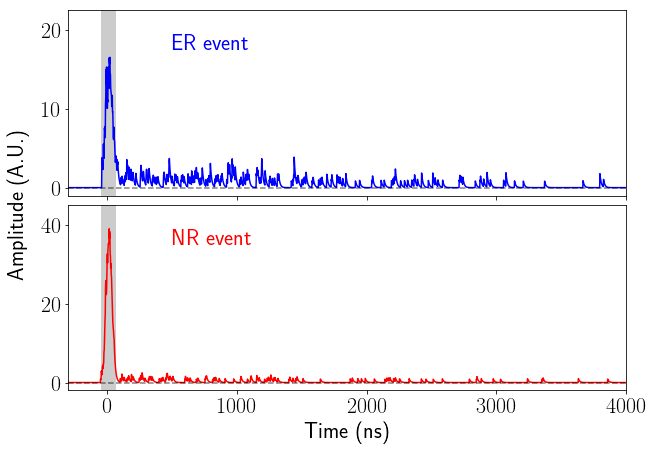

In [38]:
plt.figure(figsize = (10, 7))
gs = gridspec.GridSpec(2, 1, hspace = 0.05, wspace = 0.05) #width_ratios=[1,1,0.05], hspace=-50) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
plt.sca(ax0)
plt.plot(t, y_er, color='blue')
# plt.ylim(-2, 45)
plt.ylim(-1, 22.5)
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(500, 35/2, 'ER event', color='blue')
plt.xlim(-300, 4000)
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
ax0.axes.xaxis.set_ticklabels([])

# plt.xticks([])

plt.sca(ax1)
plt.plot(t, y_nr, color='red')
plt.ylim(-2, 45)
plt.xlim(-300, 4000)
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(500, 35, 'NR event', color='red')
plt.ylabel('Amplitude (A.U.)')
ax1.yaxis.set_label_coords(-0.07, 1)
plt.xlabel('Time (ns)')
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
plt.savefig('plots/argon_waveform.pdf', bbox_inches='tight')
plt.show()